In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
673,674,15745621,Wertheim,640,Spain,Female,32,6,118879.35,2,1,1,19131.71,0
5925,5926,15783477,Biryukov,706,Germany,Female,39,8,112889.91,1,0,1,6723.66,0
6240,6241,15626507,Chukwubuikem,558,France,Male,27,1,152283.39,1,1,0,183271.15,0
3355,3356,15623062,Vasilyeva,660,Germany,Male,24,5,85089.30,1,1,1,71638.00,0
2843,2844,15693233,De Neeve,666,Germany,Male,38,6,99812.88,2,1,1,158357.97,0
6261,6262,15595162,Cattaneo,708,Spain,Female,35,8,122570.69,1,0,0,199005.88,0
5893,5894,15641004,Doyne,605,Spain,Female,48,10,150315.92,1,0,1,133486.36,0
510,511,15568506,Forbes,524,Germany,Female,31,10,67238.98,2,1,1,161811.23,0
9438,9439,15641175,Munro,701,Germany,Male,63,3,120916.52,3,0,0,144727.45,1
7274,7275,15680901,Potter,652,France,Female,34,6,97435.85,2,1,1,104331.76,0


In [4]:
df=df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [5]:
df.shape

(10000, 11)

<Axes: xlabel='Exited', ylabel='count'>

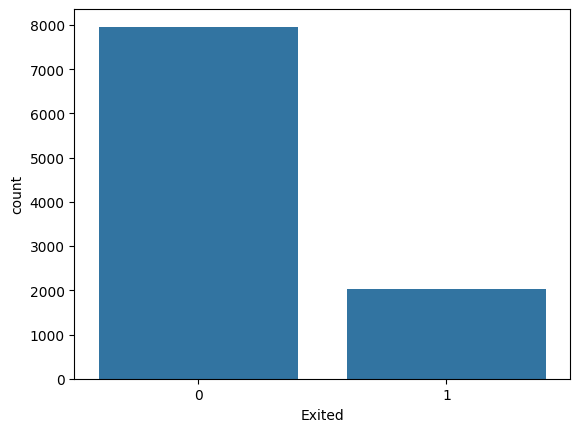

In [6]:
sns.countplot(x="Exited",data=df)

In [7]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [8]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
df=pd.get_dummies(df,columns=["Geography","Gender"])

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [13]:
y=df[["Exited"]]
X=df.drop("Exited",axis=1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression #Classification
model_lr=LogisticRegression()

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
model_lr.fit(X_train,y_train)

LogisticRegression()

In [20]:
model_lr.score(X_train,y_train)

0.791125

In [21]:
model_lr.score(X_test,y_test)

0.7995

In [42]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(max_depth=8)

In [43]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [44]:
model_dt.score(X_train,y_train)

0.881375

In [45]:
model_dt.score(X_test,y_test)

0.862

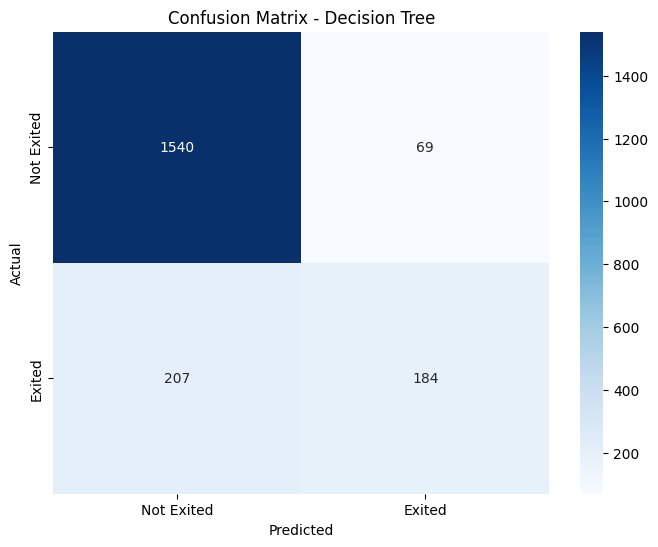

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the Decision Tree model
y_pred_dt = model_dt.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [47]:
(184+1540)/2000

0.862

In [48]:
from sklearn.metrics import classification_report

# Get predictions from the Decision Tree model
y_pred_dt = model_dt.predict(X_test)

# Generate and print the classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1609
           1       0.73      0.47      0.57       391

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
TP=184
TN=1540
FP=69
FN=207